In [1]:
"""
Optimizing threshold for private multiplicative weights
Author: Albert Sun 7/13/2021
"""
from src.hdmm import workload, fairtemplates, error, fairmechanism, matrix, mechanism, templates
from implementations import pmw, pmw_optimized
import numpy as np

## Intialize Workloads


In [2]:
W_identity = workload.Identity(8).dense_matrix()
W_allrange = workload.AllRange(8).dense_matrix()
W_total = workload.Total(8).dense_matrix()

W_five_identity = np.vstack((W_identity, W_identity, W_identity, W_identity, W_identity))
W_sd = np.vstack((W_identity, W_allrange))
W_ds = np.vstack((W_allrange, W_identity))
W_sds = np.vstack((W_identity, W_allrange, W_identity))
W_dsd = np.vstack((W_allrange, W_identity, W_allrange))
W_random = np.random.permutation(W_sd)

## Initialize Databases


In [3]:
x_flat = np.array([1000, 1210, 1300, 1250, 1500, 1450, 1700, 1720])
x_peaks = np.array([1000, 8000, 1300, 1250, 9000, 1450, 1700, 1720])

## Implementations

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
Workload:
0 [1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1.]
8 [1. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 1. 0. 0. 0. 0. 0. 0.]
10 [0. 0. 1. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 1. 0. 0. 0. 0.]
12 [0. 0. 0. 0. 1. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 1. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 1. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 1.]
16 [1. 0. 0. 0. 0. 0. 0. 0.]
17 [0. 1. 0. 0. 0. 0. 0. 0.]
18 [0. 0. 1. 0. 0. 0. 0. 0.]
19 [0. 0. 0. 1. 0. 0. 0. 0.]
20 [0. 0. 0. 0. 1. 0. 0. 0.]
21 [0. 0. 0. 0. 0. 1. 0. 0.]
22 [0. 0. 0. 0. 0. 0. 1. 0.]
23 [0. 0. 0. 0. 0. 0. 0. 1.]
24 [1. 0. 0. 0. 0. 0. 0. 0.]
25 [0. 1. 0. 0. 0. 0. 0. 0.]
26 [0. 0. 1. 0. 0. 0. 0. 0.]
27 [0. 0. 0. 1. 0. 0. 0. 0.]
28 [0. 0. 0. 0. 1. 0. 0. 0.]
29 [0. 0. 0. 0. 0. 1. 0. 0.]
30 [0. 0. 0. 0. 0. 0. 1. 0.]
31 [0. 0. 0. 0. 0. 0. 0. 1.]
32 [1. 0. 0

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

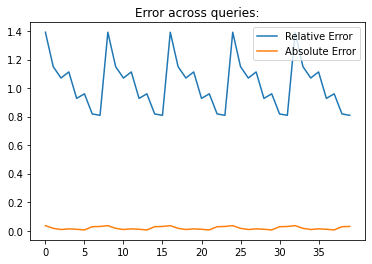

In [4]:
pmw(W_five_identity, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
Workload:
0 [1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1.]
8 [1. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 1. 0. 0. 0. 0. 0. 0.]
10 [0. 0. 1. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 1. 0. 0. 0. 0.]
12 [0. 0. 0. 0. 1. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 1. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 1. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 1.]
16 [1. 0. 0. 0. 0. 0. 0. 0.]
17 [0. 1. 0. 0. 0. 0. 0. 0.]
18 [0. 0. 1. 0. 0. 0. 0. 0.]
19 [0. 0. 0. 1. 0. 0. 0. 0.]
20 [0. 0. 0. 0. 1. 0. 0. 0.]
21 [0. 0. 0. 0. 0. 1. 0. 0.]
22 [0. 0. 0. 0. 0. 0. 1. 0.]
23 [0. 0. 0. 0. 0. 0. 0. 1.]
24 [1. 0. 0. 0. 0. 0. 0. 0.]
25 [0. 1. 0. 0. 0. 0. 0. 0.]
26 [0. 0. 1. 0. 0. 0. 0. 0.]
27 [0. 0. 0. 1. 0. 0. 0. 0.]
28 [0. 0. 0. 0. 1. 0. 0. 0.]
29 [0. 0. 0. 0. 0. 1. 0. 0.]
30 [0. 0. 0. 0. 0. 0. 1. 0.]
31 [0. 0. 0. 0. 0. 0. 0. 1.]
32 [1. 0. 0

[0.125,
 0.3113820208991867,
 0.12511735240139552,
 0.12511735240139552,
 0.35191021246658294,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.30600158175313025,
 0.12535183478939738,
 0.12535183478939738,
 0.3507103541576687,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.12546896270234803,
 0.31382244639493206,
 0.12558542837542097,
 0.12558542837542097,
 0.3516026196648818,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.12570211046624905,
 0.320359650903553,
 0.12581813161544736,
 0.12581813161544736,
 0.3499764969252022,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.12593436713404177,
 0.32314810044715303,
 0.1260499430275195,
 0.1260499430275195,
 0.3486350935874042,
 0.12616573125473568,
 0.12616573125473568,
 0.12616573125473568]

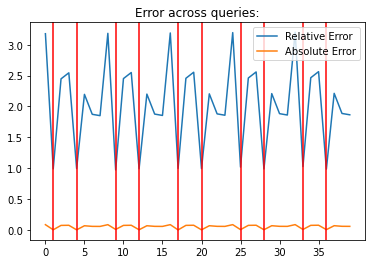

In [5]:
pmw(W_five_identity, x_peaks)

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
Workload:
0 [1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1.]
8 [1. 0. 0. 0. 0. 0. 0. 0.]
9 [1. 1. 0. 0. 0. 0. 0. 0.]
10 [1. 1. 1. 0. 0. 0. 0. 0.]
11 [1. 1. 1. 1. 0. 0. 0. 0.]
12 [1. 1. 1. 1. 1. 0. 0. 0.]
13 [1. 1. 1. 1. 1. 1. 0. 0.]
14 [1. 1. 1. 1. 1. 1. 1. 0.]
15 [1. 1. 1. 1. 1. 1. 1. 1.]
16 [0. 1. 0. 0. 0. 0. 0. 0.]
17 [0. 1. 1. 0. 0. 0. 0. 0.]
18 [0. 1. 1. 1. 0. 0. 0. 0.]
19 [0. 1. 1. 1. 1. 0. 0. 0.]
20 [0. 1. 1. 1. 1. 1. 0. 0.]
21 [0. 1. 1. 1. 1. 1. 1. 0.]
22 [0. 1. 1. 1. 1. 1. 1. 1.]
23 [0. 0. 1. 0. 0. 0. 0. 0.]
24 [0. 0. 1. 1. 0. 0. 0. 0.]
25 [0. 0. 1. 1. 1. 0. 0. 0.]
26 [0. 0. 1. 1. 1. 1. 0. 0.]
27 [0. 0. 1. 1. 1. 1. 1. 0.]
28 [0. 0. 1. 1. 1. 1. 1. 1.]
29 [0. 0. 0. 1. 0. 0. 0. 0.]
30 [0. 0. 0. 1. 1. 0. 0. 0.]
31 [0. 0. 0. 1. 1. 1. 0. 0.]
32 [0. 0. 0

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.25,
 0.375,
 0.4009132870767322,
 0.5401785054314007,
 0.7128453085013124,
 0.8639614880836651,
 0.9638463709283108,
 0.1232165385905706,
 0.2464330771811412,
 0.34450946758117396,
 0.4799777842288282,
 0.604565121612992,
 0.7509235231661384,
 0.9108844349694696,
 0.12056634555491874,
 0.24113269110983748,
 0.3841630841948168,
 0.4950642802220004,
 0.6281544481242162,
 0.7803700602981065,
 0.11813676740748745,
 0.23899377296286814,
 0.356159124265343,
 0.49317821719224697,
 0.6984711104378523,
 0.11877727441195009,
 0.24168055493686874,
 0.44981943729195983,
 0.5648115107091141,
 0.12133314936516344,
 0.3061420756261645,
 0.4521119365729599,
 0.12501591510638593,
 0.32185331728637506,
 0.1327261401575676]

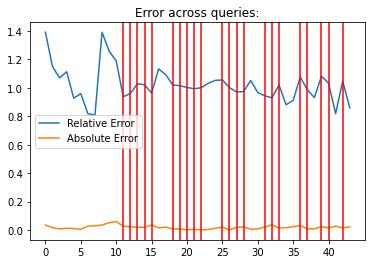

In [6]:
pmw(W_sd, x_flat)

original database: [1000 8000 1300 1250 9000 1450 1700 1720]
Workload:
0 [1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1.]
8 [1. 0. 0. 0. 0. 0. 0. 0.]
9 [1. 1. 0. 0. 0. 0. 0. 0.]
10 [1. 1. 1. 0. 0. 0. 0. 0.]
11 [1. 1. 1. 1. 0. 0. 0. 0.]
12 [1. 1. 1. 1. 1. 0. 0. 0.]
13 [1. 1. 1. 1. 1. 1. 0. 0.]
14 [1. 1. 1. 1. 1. 1. 1. 0.]
15 [1. 1. 1. 1. 1. 1. 1. 1.]
16 [0. 1. 0. 0. 0. 0. 0. 0.]
17 [0. 1. 1. 0. 0. 0. 0. 0.]
18 [0. 1. 1. 1. 0. 0. 0. 0.]
19 [0. 1. 1. 1. 1. 0. 0. 0.]
20 [0. 1. 1. 1. 1. 1. 0. 0.]
21 [0. 1. 1. 1. 1. 1. 1. 0.]
22 [0. 1. 1. 1. 1. 1. 1. 1.]
23 [0. 0. 1. 0. 0. 0. 0. 0.]
24 [0. 0. 1. 1. 0. 0. 0. 0.]
25 [0. 0. 1. 1. 1. 0. 0. 0.]
26 [0. 0. 1. 1. 1. 1. 0. 0.]
27 [0. 0. 1. 1. 1. 1. 1. 0.]
28 [0. 0. 1. 1. 1. 1. 1. 1.]
29 [0. 0. 0. 1. 0. 0. 0. 0.]
30 [0. 0. 0. 1. 1. 0. 0. 0.]
31 [0. 0. 0. 1. 1. 1. 0. 0.]
32 [0. 0. 0

[0.125,
 0.3152875057514111,
 0.12511735240139552,
 0.12511735240139552,
 0.3703612931296795,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.1252349253552277,
 0.3548074779710702,
 0.4130700600869338,
 0.4529912569927332,
 0.8198433799758409,
 0.8661751281987271,
 0.9421368164303877,
 1.0002466446906206,
 0.31505025507646767,
 0.3669040024844223,
 0.41797591077600454,
 0.7776132494979795,
 0.823907876233501,
 0.893862192916169,
 0.9643099872671532,
 0.1213499967894642,
 0.24454179921203203,
 0.45503349425737943,
 0.5082697313381218,
 0.5679132822055175,
 0.645522991695424,
 0.12156420515677624,
 0.4025883152388698,
 0.4600713976693304,
 0.5172685924462896,
 0.5942046139595397,
 0.3621374208335948,
 0.4124909293883245,
 0.4776026595189672,
 0.5463828547598278,
 0.12338549531652379,
 0.12177090627872833,
 0.18200862357636363,
 0.12680858851706714,
 0.1293123752306332,
 0.13193200629682753]

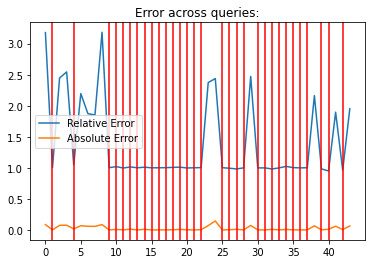

In [7]:
pmw(W_sd, x_peaks)

So far, it is clear that the algorithm updates more when 
- answering dense (all-range) than sparse (identity) workloads,
- flat than uneven dataframes.

The next question we need to think about is what to initialize the threshold and level of laplace noise to add. 

7/16 Questions - what do we initialize laplace_scale and threshold to be? How do I use epsilon and beta for this new instance?

# optimized

original database: [1000 1210 1300 1250 1500 1450 1700 1720]
Workload:
0 [1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 1. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 1.]
8 [1. 0. 0. 0. 0. 0. 0. 0.]
9 [0. 1. 0. 0. 0. 0. 0. 0.]
10 [0. 0. 1. 0. 0. 0. 0. 0.]
11 [0. 0. 0. 1. 0. 0. 0. 0.]
12 [0. 0. 0. 0. 1. 0. 0. 0.]
13 [0. 0. 0. 0. 0. 1. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 1. 0.]
15 [0. 0. 0. 0. 0. 0. 0. 1.]
16 [1. 0. 0. 0. 0. 0. 0. 0.]
17 [0. 1. 0. 0. 0. 0. 0. 0.]
18 [0. 0. 1. 0. 0. 0. 0. 0.]
19 [0. 0. 0. 1. 0. 0. 0. 0.]
20 [0. 0. 0. 0. 1. 0. 0. 0.]
21 [0. 0. 0. 0. 0. 1. 0. 0.]
22 [0. 0. 0. 0. 0. 0. 1. 0.]
23 [0. 0. 0. 0. 0. 0. 0. 1.]
24 [1. 0. 0. 0. 0. 0. 0. 0.]
25 [0. 1. 0. 0. 0. 0. 0. 0.]
26 [0. 0. 1. 0. 0. 0. 0. 0.]
27 [0. 0. 0. 1. 0. 0. 0. 0.]
28 [0. 0. 0. 0. 1. 0. 0. 0.]
29 [0. 0. 0. 0. 0. 1. 0. 0.]
30 [0. 0. 0. 0. 0. 0. 1. 0.]
31 [0. 0. 0. 0. 0. 0. 0. 1.]
32 [1. 0. 0

[0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.15273530038459845,
 0.15453726457613257,
 0.12535469115171977,
 0.12535469115171977,
 0.12535469115171977,
 0.12535469115171977,
 0.12535469115171977,
 0.12535469115171977,
 0.15273884299301208,
 0.15453716636179737,
 0.1257073523245352,
 0.1257073523245352,
 0.1257073523245352,
 0.1257073523245352,
 0.1257073523245352,
 0.1257073523245352,
 0.15274052560845489,
 0.15453700660838332,
 0.12605797824641407,
 0.12605797824641407,
 0.12605797824641407,
 0.12605797824641407,
 0.12605797824641407,
 0.12605797824641407,
 0.15273858833329215,
 0.15453724119118892,
 0.12640656396815814,
 0.12640656396815814,
 0.12640656396815814,
 0.12640656396815814,
 0.12640656396815814,
 0.12640656396815814,
 0.15273853322107672,
 0.15453689595461403]

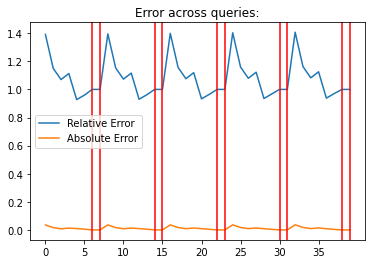

In [20]:
pmw_optimized(W_five_identity, x_flat, laplace_scale=0.01, threshold=1500)